### <font color="orange">ライブラリ読み込み</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### <font color="orange">データ読み込み</font>

In [3]:
data = pd.read_csv("./make_data/maked_data.csv")
data.head()

,pitch_name,game_year,game_month,game_day,home_team,LAA_score,ENEMY_score,stand,on_3b,on_2b,on_1b,inning,pitch_number,outs_when_up,balls,strikes,sz_top,sz_bot,is_first_pitch_number,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,release_extension,plate_x,plate_z,events,description,zone,type,hc_x,hc_y
0,1,2022,4,7,0,0,0,0,0,0,0,1,1,0,0,0,2.90,1.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022,4,7,0,0,0,0,0,0,0,1,2,0,1,0,2.90,1.28,0,99.8,-2.19,53.43,5.82,2182.0,7.1,1.32,-0.29,19.0,0.0,14.0,1.0,0.0,0.0
2,1,2022,4,7,0,0,0,0,0,0,0,1,3,0,1,1,2.81,1.21,0,97.9,-2.16,53.54,5.89,2164.0,7.0,-0.62,2.01,19.0,2.0,4.0,0.0,0.0,0.0
3,0,2022,4,7,0,0,0,0,0,0,0,1,4,0,2,1,2.79,1.30,0,99.2,-2.13,53.63,5.87,2320.0,6.9,1.53,1.84,19.0,0.0,14.0,1.0,0.0,0.0
4,2,2022,4,7,0,0,0,0,0,0,0,1,5,0,2,2,2.83,1.23,0,86.9,-2.29,53.52,5.77,2440.0,7.0,-0.64,1.74,19.0,2.0,7.0,0.0,0.0,0.0


In [4]:
print(f"2022年 : {data[data['game_year'].isin([2022])].shape}")
print(f"2023年 : {data[data['game_year'].isin([2023])].shape}")

2022年 : (2629, 33)
2023年 : (2094, 33)


### <font color="orange">欠損値確認</font>

In [5]:
data.isna().sum().sum()

16716

### <font color="orange">データタイプ確認</font>

In [6]:
# int, float以外のカラムがあるか確認
data.select_dtypes(exclude=["int", "float"]).columns.to_list()

[]

In [7]:
data.head()

,pitch_name,game_year,game_month,game_day,home_team,LAA_score,ENEMY_score,stand,on_3b,on_2b,on_1b,inning,pitch_number,outs_when_up,balls,strikes,sz_top,sz_bot,is_first_pitch_number,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,release_extension,plate_x,plate_z,events,description,zone,type,hc_x,hc_y
0,1,2022,4,7,0,0,0,0,0,0,0,1,1,0,0,0,2.90,1.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022,4,7,0,0,0,0,0,0,0,1,2,0,1,0,2.90,1.28,0,99.8,-2.19,53.43,5.82,2182.0,7.1,1.32,-0.29,19.0,0.0,14.0,1.0,0.0,0.0
2,1,2022,4,7,0,0,0,0,0,0,0,1,3,0,1,1,2.81,1.21,0,97.9,-2.16,53.54,5.89,2164.0,7.0,-0.62,2.01,19.0,2.0,4.0,0.0,0.0,0.0
3,0,2022,4,7,0,0,0,0,0,0,0,1,4,0,2,1,2.79,1.30,0,99.2,-2.13,53.63,5.87,2320.0,6.9,1.53,1.84,19.0,0.0,14.0,1.0,0.0,0.0
4,2,2022,4,7,0,0,0,0,0,0,0,1,5,0,2,2,2.83,1.23,0,86.9,-2.29,53.52,5.77,2440.0,7.0,-0.64,1.74,19.0,2.0,7.0,0.0,0.0,0.0


### <font color="orange">train_data, test_dataに分割</font>

In [8]:
select_game_year = [2022, 2023]

In [9]:
from sklearn.model_selection import train_test_split

def make_train_test_data(select_game_year=select_game_year):
    
    data = pd.read_csv("./make_data/maked_data.csv")
    
    categolical_list = [
        "outs_when_up",
        "balls",
        "strikes",
        "events",
        "description",
        "zone",
        "type"
    ]
    
    data[categolical_list] = data[categolical_list].astype("category")
    
    # 対象年度の抽出
    data = data[data["game_year"].isin(select_game_year)]
    del data["game_year"]
    del data["game_month"]
    del data["game_day"]
    
    X = data.drop("pitch_name", axis=1)
    y = data["pitch_name"]
    
    # データを前半80%（train_data）と後半20%（test_data）に分割
    split_index = int(len(data) * 0.8)
    X_train = X.iloc[: split_index]
    y_train = y.iloc[: split_index]
    X_test = X.iloc[split_index : ]
    y_test = y.iloc[split_index : ]

    
    if y_train.nunique() != y_test.nunique():
        raise ValueError("train_dataとtest_dataの要素が一致していません。")
    
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = make_train_test_data(select_game_year=[2022, 2023])

# 確認
X_train.shape, X_test.shape

((3778, 29), (945, 29))

In [10]:
X_train.select_dtypes(include="category").columns

Index(['outs_when_up', 'balls', 'strikes', 'events', 'description', 'zone',
       'type'],
      dtype='object')

### <font color="orange">モデル学習、予測</font>

In [11]:
# カスタムメトリック定義
from sklearn.metrics import f1_score, accuracy_score, log_loss

def f1(y_pred, dataset):
    y_true = dataset.get_label()
    score = f1_score(y_true=y_true, y_pred=np.argmax(y_pred, axis=1), average="macro")
    return "f1", score, True

def accuracy(y_pred, dataset):
    y_true = dataset.get_label()
    auc_score = accuracy_score(y_true=y_true, y_pred=np.argmax(y_pred, axis=1))
    return "accuracy", auc_score, True

def custom_multi_logloss(y_pred, dataset):
    y_true = dataset.get_label()
    multi_logloss = log_loss(y_true=y_true, y_pred=y_pred.reshape(-1,3))
    return "multi_logloss", multi_logloss, False

In [12]:
import lightgbm as lgb

params = {
    "boosting" : "gbdt",
    "objective" : "multiclass",
    "metric" : "None",
    "num_class" : y_train.nunique(),
    "seed" : 42,
    "verbose" : -1,
    "num_threads" : 2
}

select_game_years = [[2022], [2023], [2022, 2023]]

models = {}
evals_results = {}
y_test_preds = {}
y_tests = {}


for select_game_year in select_game_years:
    
    # data作成
    X_train, y_train, X_test, y_test = make_train_test_data(select_game_year=select_game_year)
    
    # train_dataをtrain_data（前半80%）とvalid_data（後半20%）に分割
    split_index = int(len(X_train) * 0.8)
    X_valid = X_train.iloc[split_index : ].copy()
    y_valid = y_train.iloc[split_index : ].copy()
    X_train = X_train.iloc[ : split_index].copy()
    y_train = y_train.iloc[ : split_index].copy()
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)
    
    # 誤差プロットの格納用データ
    evals_result = {}
    
    model = lgb.train(params=params,
                      train_set=lgb_train,
                      num_boost_round=800,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=["train", "valid"],
                      # metric : "multi_logloss" またはmetrics : "" とすると、
                      # model.best_iterationはmulti_loglossのベストイテレーションとなる。
                      # multi_loglossのログを取得しつつ、f1でベストイテレーションを求めるために、
                      # metric : "None" とし、feval に自分で定義した custom_multi_logloss　を追加する。
                      # 以下feval はリストの最初のmetricを参照してベストイテレーションを算出する。
                      # （objectibeのmulti_loglossと結果が一致することは確認済み）
                      feval=[f1, accuracy, custom_multi_logloss],
                      callbacks=[lgb.log_evaluation(200),
                                 lgb.early_stopping(800),
                                 lgb.record_evaluation(evals_result)]
                      )
    
    key = str(select_game_year)
    models[key] = model
    evals_results[key] = evals_result

    # 予測
    y_test_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)
    y_test_pred = np.argmax(y_test_pred_proba, axis=1)
    
    y_test_preds[key] = y_test_pred
    y_tests[key] = y_test
    print()

Training until validation scores don't improve for 800 rounds
[200]	train's f1: 0.997043	train's accuracy: 0.997027	train's multi_logloss: 0.102323	valid's f1: 0.417508	valid's accuracy: 0.429929	valid's multi_logloss: 1.46922
[400]	train's f1: 1	train's accuracy: 1	train's multi_logloss: 0.0151958	valid's f1: 0.40256	valid's accuracy: 0.413302	valid's multi_logloss: 1.9322
[600]	train's f1: 1	train's accuracy: 1	train's multi_logloss: 0.00222214	valid's f1: 0.411183	valid's accuracy: 0.420428	valid's multi_logloss: 2.45213
[800]	train's f1: 1	train's accuracy: 1	train's multi_logloss: 0.000342809	valid's f1: 0.405512	valid's accuracy: 0.413302	valid's multi_logloss: 2.98652
Did not meet early stopping. Best iteration is:
[47]	train's f1: 0.91667	train's accuracy: 0.916766	train's multi_logloss: 0.480003	valid's f1: 0.44545	valid's accuracy: 0.460808	valid's multi_logloss: 1.15025

Training until validation scores don't improve for 800 rounds
[200]	train's f1: 1	train's accuracy: 1	tra

### <font color="orange"> 確認</font>

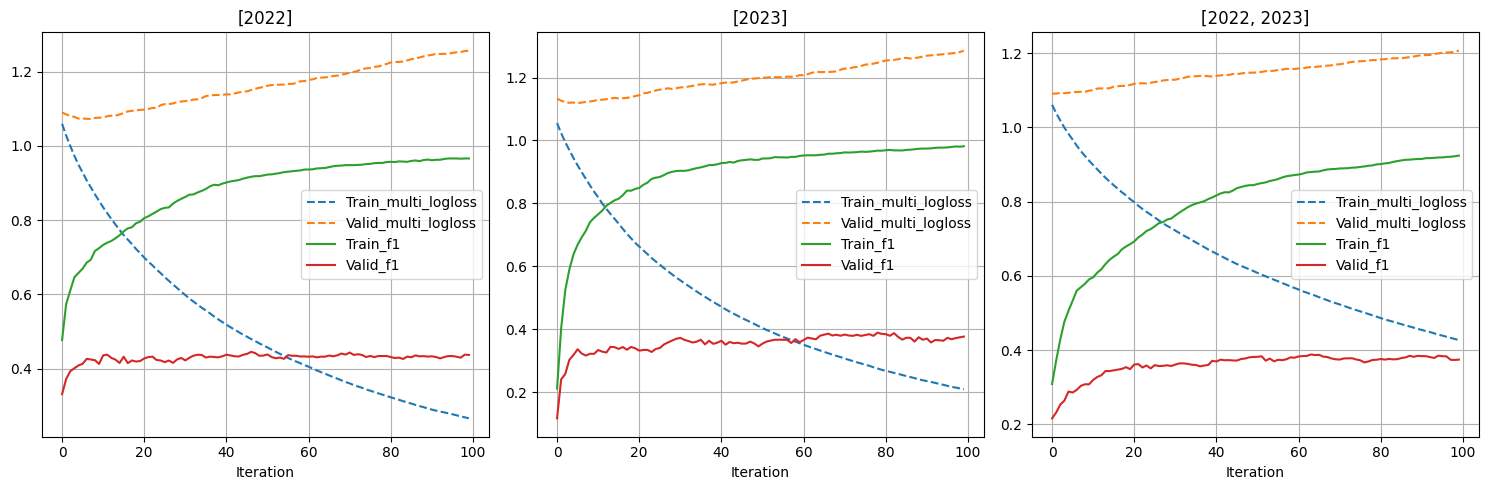

In [13]:
import matplotlib.pyplot as plt

def metrics_plot(evals_results, select_multi_logloss, select_f1, select_accuracy):
    
    x_range = 100
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    i = 0
    
    for key, value in evals_results.items():
        ax = axes[i]
        
        if select_multi_logloss:
            ax.plot(value["train"]["multi_logloss"][:x_range], label="Train_multi_logloss", linestyle="dashed")
            ax.plot(value["valid"]["multi_logloss"][:x_range], label="Valid_multi_logloss", linestyle="dashed")

        if select_f1:
            ax.plot(value["train"]["f1"][:x_range], label="Train_f1")
            ax.plot(value["valid"]["f1"][:x_range], label="Valid_f1")

        if select_accuracy:
            ax.plot(value["train"]["accuracy"][:x_range], label="Train_accuracy")
            ax.plot(value["valid"]["accuracy"][:x_range], label="Valid_accuracy")
    
        ax.set_xlabel("Iteration")    
        ax.set_title(key)
        ax.legend()
        ax.grid()
        
        i += 1

    plt.tight_layout()
    plt.show()

metrics_plot(evals_results, select_multi_logloss=True, select_f1=True, select_accuracy=False)


### <font color="orange">検証データを学習データに戻してモデルを再構築</font>

In [14]:
import lightgbm as lgb

params = {
    "boosting" : "gbdt",
    "objective" : "multiclass",
    "metric" : "None",
    "num_class" : y_train.nunique(),
    "seed" : 42,
    "verbose" : -1,
    "num_threads" : 2
}

select_game_years = [[2022], [2023], [2022, 2023]]

models = {}
evals_results = {}
y_test_preds = {}
y_tests = {}


for select_game_year in select_game_years:
    
    # data作成
    X_train, y_train, X_test, y_test = make_train_test_data(select_game_year=select_game_year)
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    
    # 誤差プロットの格納用データ
    evals_result = {}
    
    model = lgb.train(params=params,
                      train_set=lgb_train,
                      num_boost_round=800,
                      valid_sets=[lgb_train, lgb_eval],
                      valid_names=["train", "valid"],
                      # metric : "multi_logloss" またはmetrics : "" とすると、
                      # model.best_iterationはmulti_loglossのベストイテレーションとなる。
                      # multi_loglossのログを取得しつつ、f1でベストイテレーションを求めるために、
                      # metric : "None" とし、feval に自分で定義した custom_multi_logloss　を追加する。
                      # 以下feval はリストの最初のmetricを参照してベストイテレーションを算出する。
                      # （objectibeのmulti_loglossと結果が一致することは確認済み）
                      feval=[f1, accuracy, custom_multi_logloss],
                      callbacks=[lgb.log_evaluation(200),
                                 lgb.early_stopping(800),
                                 lgb.record_evaluation(evals_result)]
                      )
    
    key = str(select_game_year)
    models[key] = model
    evals_results[key] = evals_result

    # 予測
    y_test_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)
    y_test_pred = np.argmax(y_test_pred_proba, axis=1)
    
    y_test_preds[key] = y_test_pred
    y_tests[key] = y_test
    print()

Training until validation scores don't improve for 800 rounds
[200]	train's f1: 0.989906	train's accuracy: 0.990014	train's multi_logloss: 0.149125	valid's f1: 0.361472	valid's accuracy: 0.404943	valid's multi_logloss: 1.3533
[400]	train's f1: 1	train's accuracy: 1	train's multi_logloss: 0.032563	valid's f1: 0.363725	valid's accuracy: 0.410646	valid's multi_logloss: 1.67186
[600]	train's f1: 1	train's accuracy: 1	train's multi_logloss: 0.00652913	valid's f1: 0.382129	valid's accuracy: 0.425856	valid's multi_logloss: 2.03257
[800]	train's f1: 1	train's accuracy: 1	train's multi_logloss: 0.00138875	valid's f1: 0.381161	valid's accuracy: 0.422053	valid's multi_logloss: 2.44257
Did not meet early stopping. Best iteration is:
[720]	train's f1: 1	train's accuracy: 1	train's multi_logloss: 0.00254133	valid's f1: 0.393659	valid's accuracy: 0.435361	valid's multi_logloss: 2.28065

Training until validation scores don't improve for 800 rounds
[200]	train's f1: 0.997576	train's accuracy: 0.997612

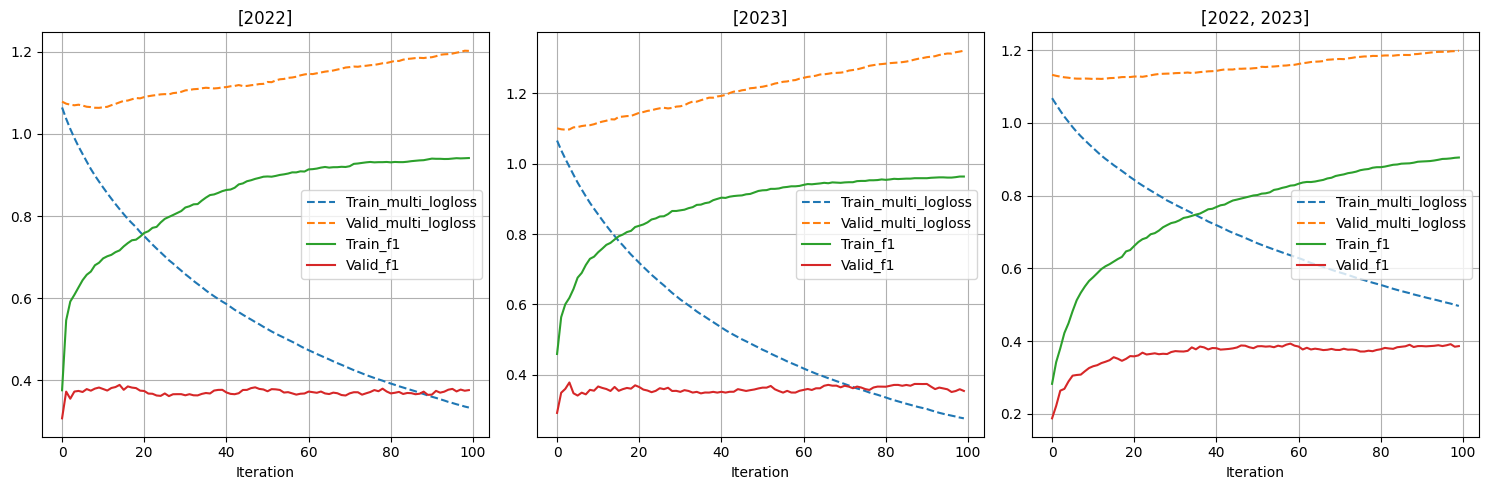

In [15]:
metrics_plot(evals_results, select_multi_logloss=True, select_f1=True, select_accuracy=False)

In [16]:
# 正解率とf1スコア
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

for key, value in y_test_preds.items():
    print(key)
    # 正解率
    auc_score = accuracy_score(y_pred=value, y_true=y_tests[key])
    print(f"正解率 : {np.round(auc_score, 5)}")
    
    # f1スコア
    n_labels = y_test.nunique()
    f1 = f1_score(y_pred=value, y_true=y_tests[key], average="macro")
    print(f"f1    : {np.round(f1, 5)}")
    print()

[2022]
正解率 : 0.43536
f1    : 0.39366

[2023]
正解率 : 0.38186
f1    : 0.37746

[2022, 2023]
正解率 : 0.4
f1    : 0.39433



In [17]:
# 混同行列の作成
from sklearn.metrics import confusion_matrix

# pitch_nameをエンコーディング
pitch_name_encording = {
    "Sweeper" : 0,
    "4-Seam Fastball" : 1,
    "other" : 2
}

def make_confusion_matrix(y_test, y_pred):
    
    labels = [i for i in range(y_test.nunique())]
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=labels)

    labels_name = list(pitch_name_encording.keys())
    columns_labels = ["pred_"+str(label) for label in labels_name]
    index_labels = ["act_"+str(label) for label in labels_name]
    cm = pd.DataFrame(cm, index=index_labels, columns=columns_labels)
    
    cm.loc["total"] = cm.sum()
    cm.loc[:, "total"] = cm.sum(axis=1)
    
    return cm

cm = make_confusion_matrix(y_test=y_test, y_pred=y_test_pred)
cm

,pred_Sweeper,pred_4-Seam Fastball,pred_other,total
act_Sweeper,156,29,69,254
act_4-Seam Fastball,184,84,117,385
act_other,116,52,138,306
total,456,165,324,945


In [18]:
# feature_impotanceのデータフレーム作成
def make_df_feature_importance(X_train, model):
    df_feature_importance = pd.DataFrame({"column_name" : X_train.columns,
                                          "feature_importance" : model.feature_importance("gain")
                                          })
    
    df_feature_importance = df_feature_importance.sort_values(by="feature_importance", ascending=False)
    df_feature_importance["feature_importance"] = df_feature_importance["feature_importance"].map(lambda x : int(x))
    
    return df_feature_importance

df_feature_importance = make_df_feature_importance(X_train=X_train, model=model)
df_feature_importance

,column_name,feature_importance
15,release_speed,2254
21,plate_x,1919
12,sz_top,1853
22,plate_z,1827
19,release_spin_rate,1779
18,release_pos_z,1756
16,release_pos_x,1749
13,sz_bot,1643
17,release_pos_y,1350
7,inning,1026
